In [39]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
# import the train csv saved from the clean up file
train_df = pd.read_csv('./new_train.csv')
# only select the columns that are number type
train_df = train_df.select_dtypes(['number'])
# fill in empty or NaN data with the tables mean so it doesn't affect the whole database prediction that much
train_df = train_df.fillna(train_df.mean())

# do the same with test database
test_df = pd.read_csv('./new_test.csv')
test_df = test_df.select_dtypes(['number'])
test_df = test_df.fillna(test_df.mean())
test_df.head()
print(train_df.isnull().sum())



MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [41]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1459 non-null   float64
 7   BsmtFinSF1     1459 non-null   float64
 8   BsmtFinSF2     1459 non-null   float64
 9   BsmtUnfSF      1459 non-null   float64
 10  TotalBsmtSF    1459 non-null   float64
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1459 non-null   float64
 16  BsmtHalfBath   1459 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

In [43]:
# Find and check if there are still missing values
for i, r in train_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()

In [44]:

for i, r in test_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


In [45]:
# import linear regression from sklearn and then model it
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df[['SalePrice']]
lin_regr.fit(x_train, y_train)
predictions = lin_regr.predict(test_df)

# print first ten predictions
predictions[0:10]

array([[117100.88679572],
       [152628.41484955],
       [172977.41968973],
       [199929.90079074],
       [195180.37216015],
       [182385.36678819],
       [199538.54436498],
       [171598.53084787],
       [207571.27091107],
       [113689.90272705]])

In [46]:
# perform 6-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(lin_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)
# print the score
scores

array([0.85677815, 0.85669093, 0.78990731, 0.81651244, 0.75942651,
       0.48378118])

Accuracy (R^2): 0.7678426505657636


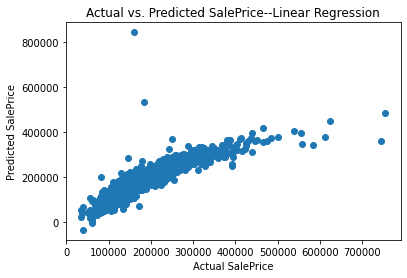

In [47]:
# Make cross validated predictions
predictions = cross_val_predict(lin_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)
plt.scatter(train_df[['SalePrice']], predictions)
plt.title("Actual vs. Predicted SalePrice--Linear Regression")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
# get accuracy of model from cross validation
accuracy = metrics.r2_score(train_df[['SalePrice']], predictions)
print("Accuracy (R^2):", accuracy)
